# Avocado price prediction

#  Problem Statement
The goal is to predict Average price of avocado using best regression model

# Importing Libraries 

In [83]:
#Importing necessary libraries 
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
from datetime import datetime
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score
import sklearn
from sklearn.preprocessing import LabelEncoder, Normalizer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore
import joblib

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor 
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import Lasso,Ridge,BayesianRidge,ElasticNet,HuberRegressor,LinearRegression,LogisticRegression,SGDRegressor
import matplotlib.pyplot as plt
%matplotlib inline
import pickle
import warnings
np.warnings.filterwarnings('ignore')



# Loading  the Dataset

In [2]:
av = pd.read_csv("avocado.csv")
av.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


Here the feature unnamed is unwanted columns, so droping this column.

In [3]:
#dropping the unwanted column
av.drop('Unnamed: 0', axis=1, inplace=True)

In [4]:
av.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


# Features
Date - The date of the observation

AveragePrice - the average price of a single avocado

type - conventional or organic

year - the year

Region - the city or region of the observation

Total Volume - Total number of avocados sold

4046 - Total number of avocados with PLU 4046 sold

4225 - Total number of avocados with PLU 4225 sold

4770 - Total number of avocados with PLU 4770 sold

# Exploratory Data Analysis (EDA)

In [5]:
#to check the whole summary
av.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


The info function shows us the column names , data types and the null values.There are no null values. 18249 entries and 13 columns. 

In [6]:
#checking dimensions of the dataset 
av.shape

(18249, 13)

In the given dataset there are 18249 rows and 13 columns.

In [7]:
#to check datatype of the dataset
av.dtypes

Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

There are 2 columns with object data type, 1 column with integer data type and remaining columns as float data type



In [8]:
#to know all the columns of the dataset
av.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

In [9]:
av.isna().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

There is no null values 

In [10]:
#checking statistical summary
av.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [11]:
av.nunique()

Date              169
AveragePrice      259
Total Volume    18237
4046            17702
4225            18103
4770            12071
Total Bags      18097
Small Bags      17321
Large Bags      15082
XLarge Bags      5588
type                2
year                4
region             54
dtype: int64

# Skewness

In [13]:
av.skew()

AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
year             0.215339
dtype: float64

The acceptable range for skewness is between +/-0.5. And we see almost all feature columns with skewness

In [14]:

av['Year'], av['Month'], av['Day'] = av['Date'].str.split('-').str
av.drop(columns=['Date','year'], inplace=True)
av

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Year,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,Albany,2015,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,Albany,2015,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,Albany,2015,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,Albany,2015,12,06
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,Albany,2015,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,WestTexNewMexico,2018,02,04
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,WestTexNewMexico,2018,01,28
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,WestTexNewMexico,2018,01,21
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,WestTexNewMexico,2018,01,14


 separated the Date column into 3 columns namely the Year, Month and Day option so that we can remove Date the object datatype column and year that is already present in Date so we are avoiding duplicate columns.

In [16]:
av['Year']=av['Year'].astype(int)
av['Month']=av['Month'].astype(int)
av['Date']=av['Day'].astype(int)
av.drop(columns=['Day'], inplace=True)
av

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Year,Month,Date
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,Albany,2015,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,Albany,2015,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,Albany,2015,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,Albany,2015,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,Albany,2015,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,WestTexNewMexico,2018,2,4
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,WestTexNewMexico,2018,1,28
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,WestTexNewMexico,2018,1,21
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,WestTexNewMexico,2018,1,14


# Visualization
     Univariate Analysis

conventional    9126
organic         9123
Name: type, dtype: int64


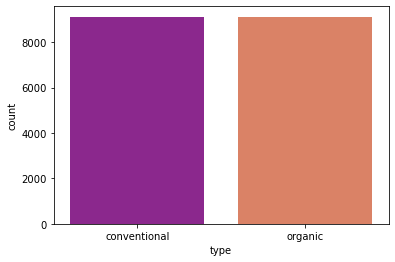

In [18]:
print(av['type'].value_counts())
sns.countplot(x='type', data=av, palette="plasma")
plt.show()

In the "type" column we have data points for conventional and organic avacados.

2017    5722
2016    5616
2015    5615
2018    1296
Name: Year, dtype: int64


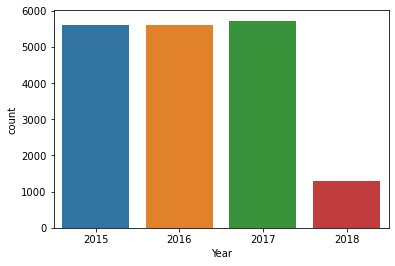

In [20]:
print(av['Year'].value_counts())
sns.countplot(x='Year', data=av)
plt.show()

In the "Year" column we see the the datapoints are very less for 2018 compared to the one's in 2015, 2016 and 2017.

1     1944
3     1836
2     1728
10    1512
7     1512
5     1512
11    1404
8     1404
4     1404
12    1403
9     1296
6     1294
Name: Month, dtype: int64


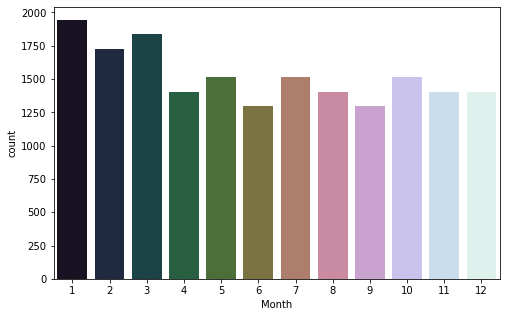

In [19]:
print(av['Month'].value_counts())
plt.figure(figsize=(8,5))
sns.countplot(x='Month', data=av, palette="cubehelix")
plt.show()

In the "Month" column we can see the least datapoints in the month of June that is number 6 and the highest value concentration is present in the month of January that is number 1.

4     756
11    756
18    755
25    755
8     648
10    648
19    648
5     648
22    648
15    648
24    648
17    648
26    648
12    648
1     648
3     648
27    540
28    540
7     540
13    540
21    540
29    540
20    540
14    540
6     539
2     432
31    432
23    432
9     432
30    432
16    432
Name: Date, dtype: int64


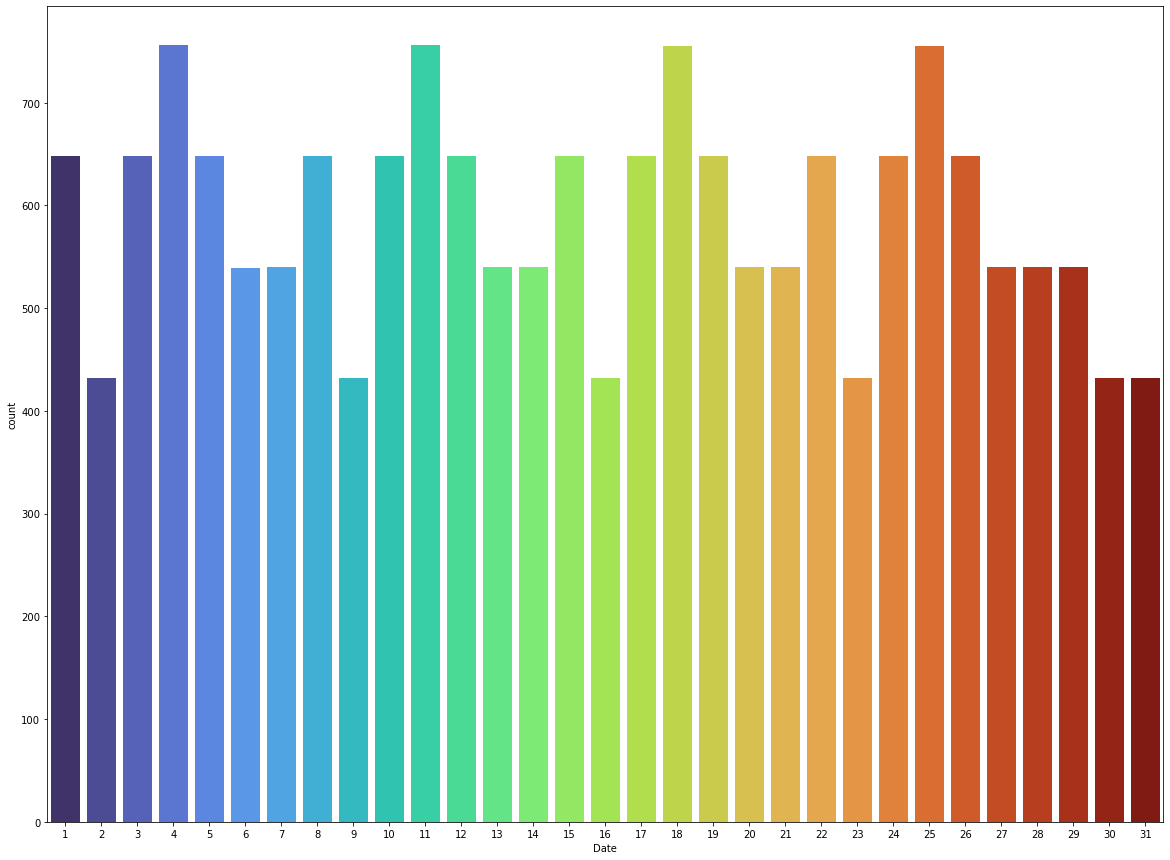

In [21]:
print(av['Date'].value_counts())
plt.figure(figsize=(20,15))
sns.countplot(x='Date', data=av, palette="turbo")
plt.show()

In the "Date" column we can see multiple date with highest and lowest datapoint concentration. Like in the highest values we have dates 11 and 4 while for lowest values we have dates 30, 16, 9, 23, 2 and 31.



Syracuse               338
Charlotte              338
RaleighGreensboro      338
Boise                  338
Orlando                338
Southeast              338
LasVegas               338
California             338
Boston                 338
NewYork                338
Houston                338
Roanoke                338
Seattle                338
Denver                 338
Nashville              338
HartfordSpringfield    338
StLouis                338
Atlanta                338
GrandRapids            338
NorthernNewEngland     338
West                   338
HarrisburgScranton     338
SouthCarolina          338
Portland               338
Northeast              338
Chicago                338
Pittsburgh             338
SanDiego               338
Midsouth               338
RichmondNorfolk        338
Indianapolis           338
LosAngeles             338
Spokane                338
DallasFtWorth          338
NewOrleansMobile       338
GreatLakes             338
MiamiFtLauderdale      338
B

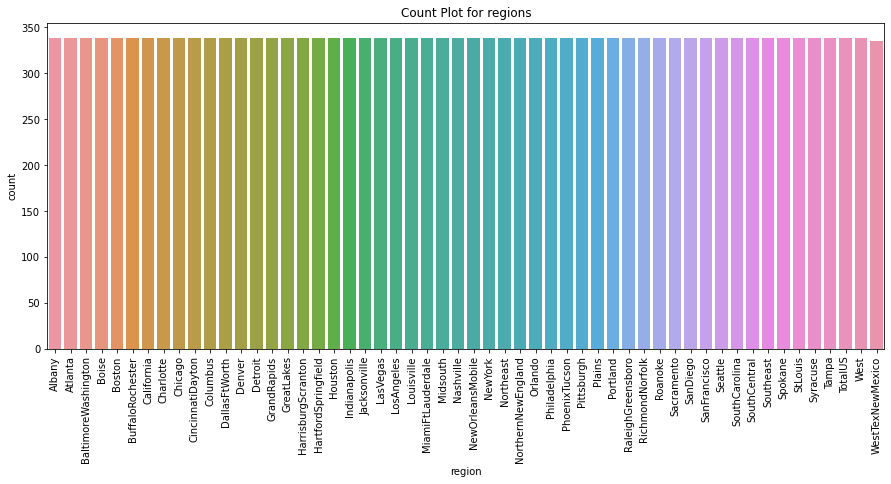

In [22]:
print(av['region'].value_counts())
plt.figure(figsize=(15,6))
sns.countplot(av['region'], data=av)
plt.title(f'Count Plot for regions')
plt.xticks(rotation=90)
plt.show()

In the "region" column we can see that the data points for almost all the values are same except WestTexNewMexico region which is a bit less than the others present in the column.

In [ ]:
- Bivariate analysis

<Figure size 1080x720 with 0 Axes>

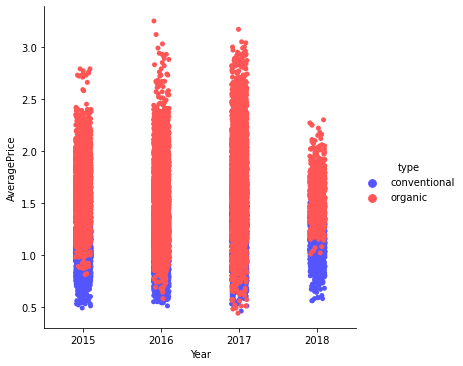

In [23]:
plt.figure(figsize=(15,10))
sns.catplot(x="Year", y="AveragePrice", hue="type", data=av, palette="seismic")
plt.show()

In the above categorical plot we see the Average Price information as per year and how conventional and organic types were sold. We can see that organic types are always priced higher than the conventional one's since organic farming requires lots of efforts, time and method to grow avacados that yield lesser when compared to conventional ways by using chemical fertilizers.

<Figure size 1080x720 with 0 Axes>

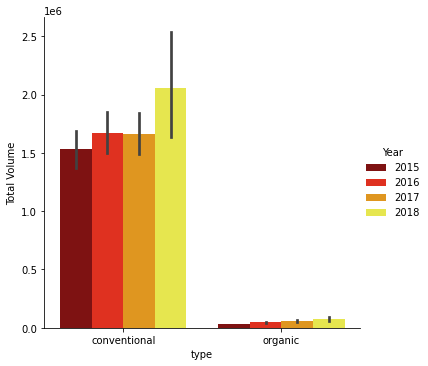

In [24]:
plt.figure(figsize=(15,10))
sns.catplot(x="type", y="Total Volume", hue="Year", kind="bar", data=av, palette="hot")
plt.show()

In the above bar plot we see that the Total Volume for conventional type were high in all 4 years when compared to it's organic counterparts.

<Figure size 1080x720 with 0 Axes>

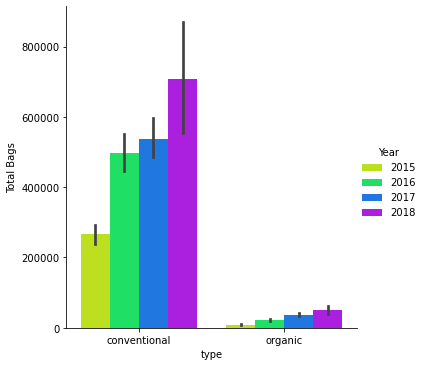

In [26]:
plt.figure(figsize=(15,10))
sns.catplot(x="type", y="Total Bags", hue="Year", data=av, kind="bar", palette="hsv")
plt.show()

In the above bar plot we see that since the Total Volume was always high for conventional types being sold therefore the usage of bags was higher for conventional types over the organic ones. Therefore we see that Total Bags is high adn specially highest in 2018 for conventional avacados just like the Total Volume that was sold being directly proportional with each other.

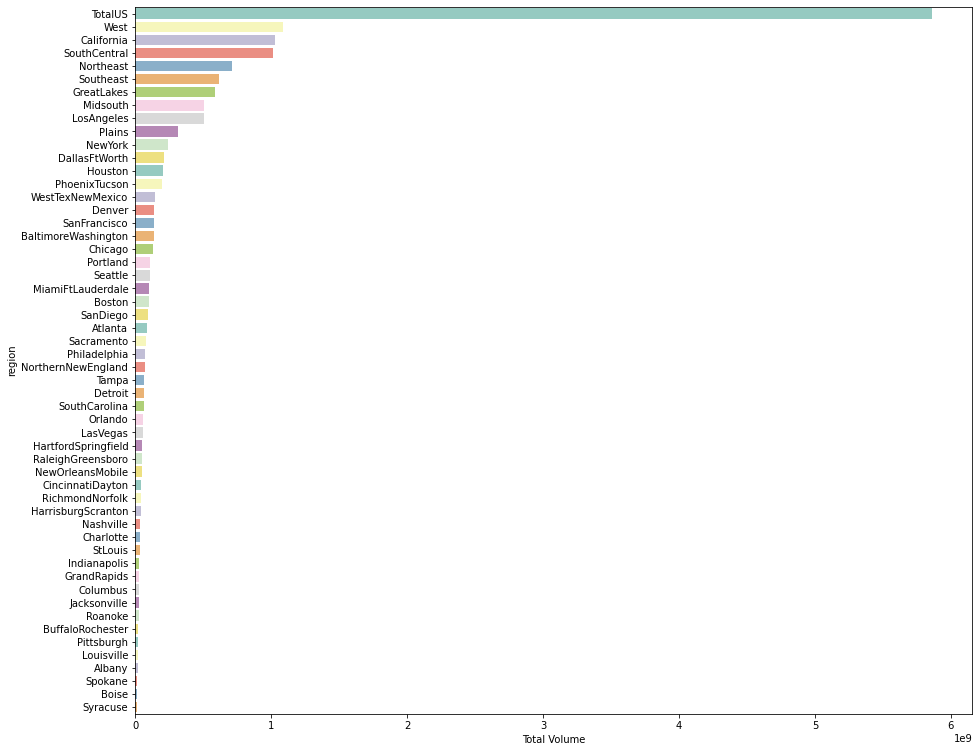

In [27]:
region = av.groupby('region')['Total Volume'].sum().sort_values(ascending=False).reset_index()
plt.figure(figsize=(15,13))
sns.barplot(x=region["Total Volume"], y=region["region"], data=av, palette="Set3")
plt.show()

In the above bar plot we can see a sorted number of Total Volume of avacados sold from each and every region. Therefore when compared to the Total US area per region values are lesser but we can see tha major contributors in region are West, California, South Central, North East, South East, Great Lakes, Mid South, Los Angeles, Plains, New York and so forth.

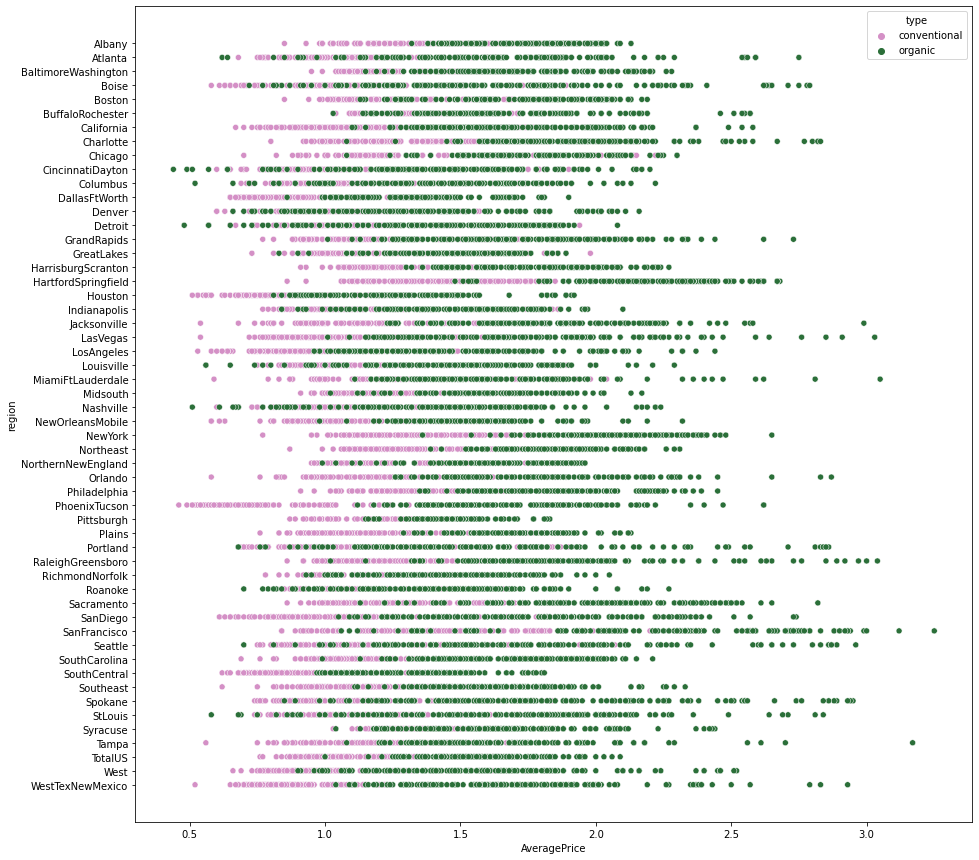

In [28]:
plt.figure(figsize=(15,15))
sns.scatterplot(x='AveragePrice', y='region', hue='type', data=av, palette="cubehelix_r")
plt.show()

In the above scatter plot that holds data between Region vs Average Price we can see clearly how organic avacados are priced way higher than it's conventional counterparts in each and every region.

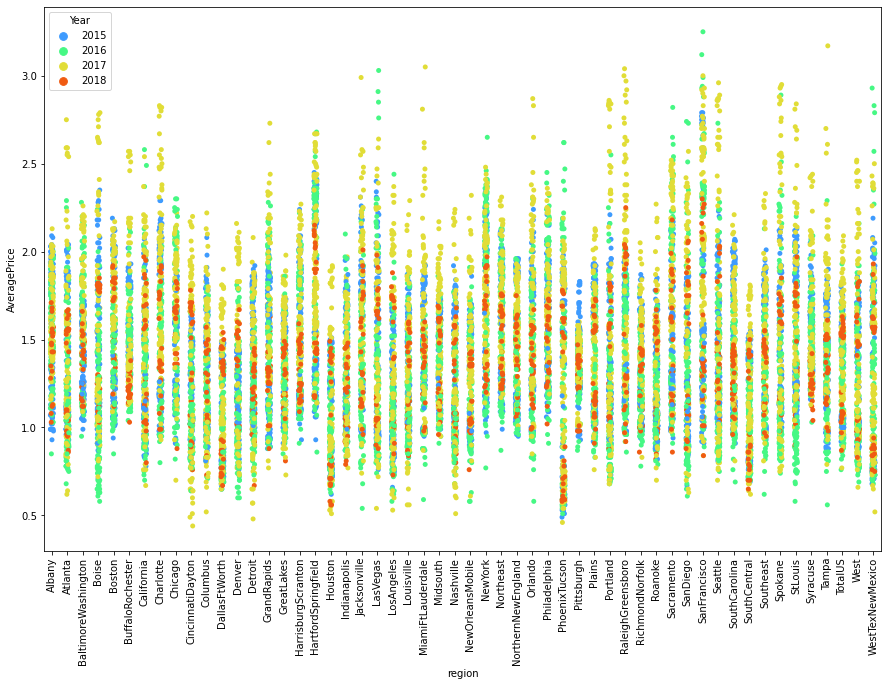

In [30]:
plt.figure(figsize=(15,10))
sns.stripplot(x='region', y='AveragePrice', hue="Year", data=av, palette="turbo")
plt.xticks(rotation=90)
plt.show()

In the above strip plot we see the Average Price of avacodos over all the regions in all 4 years. We can see that in years 2016 and 2017 the average prices were way higher than in the years 2015 and 2018.

Multivariate Analysis

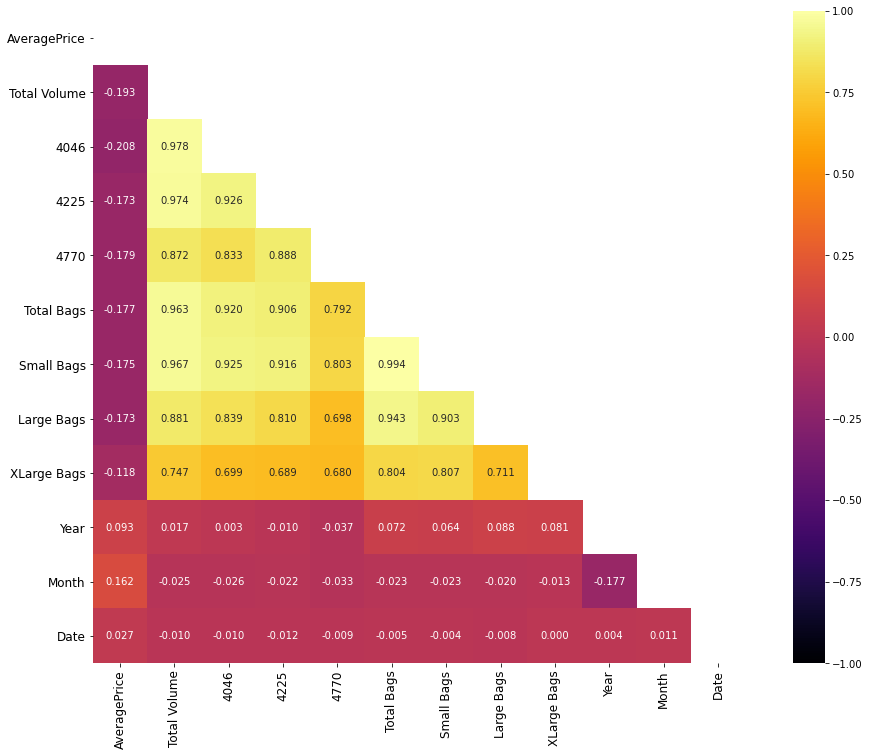

In [31]:
upper_triangle = np.triu(av.corr())
plt.figure(figsize=(17,12))
sns.heatmap(av.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10}, cmap="inferno", mask=upper_triangle)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

From the above heatmap we undertand that there is multicolinearity present in our feature columns. There are 2 types of correlation namely Positive correlation when a correlation of +1 indicates a perfect positive correlation, meaning that both variables move in the same direction together and Negative correlation when a correlation of –1 indicates a perfect negative correlation, meaning that as one variable goes up, the other goes down.

Here we notice that columns PLU 4046, PLU 4225 and PLU 4770 are all product codes that comprise the Total Volume. Similarly, the columns Small Bags, Large Bags, Extra Large Bags all comprise the Total Bags. Therefore to sort out the multicolinearity concern we can drop the unnecessary columns.

In [33]:
#dropping columns
av.drop(["4046", "4225", "4770", "Small Bags", "Large Bags", "XLarge Bags"], axis=1, inplace=True)

# Encoding

In [38]:
oe = OrdinalEncoder()
av['region']=oe.fit_transform(av['region'].values.reshape(-1,1))
av['type']=oe.fit_transform(av['type'].values.reshape(-1,1))
av

,AveragePrice,Total Volume,Total Bags,type,region,Year,Month,Date
0,1.33,64236.62,8696.87,0.0,0.0,2015,12,27
1,1.35,54876.98,9505.56,0.0,0.0,2015,12,20
2,0.93,118220.22,8145.35,0.0,0.0,2015,12,13
3,1.08,78992.15,5811.16,0.0,0.0,2015,12,6
4,1.28,51039.60,6183.95,0.0,0.0,2015,11,29
...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,13498.67,1.0,53.0,2018,2,4
18245,1.71,13888.04,9264.84,1.0,53.0,2018,1,28
18246,1.87,13766.76,9394.11,1.0,53.0,2018,1,21
18247,1.93,16205.22,10969.54,1.0,53.0,2018,1,14


Using the ordinal encoding method we have changed the object datatype columns into numeric values.

# Outliers

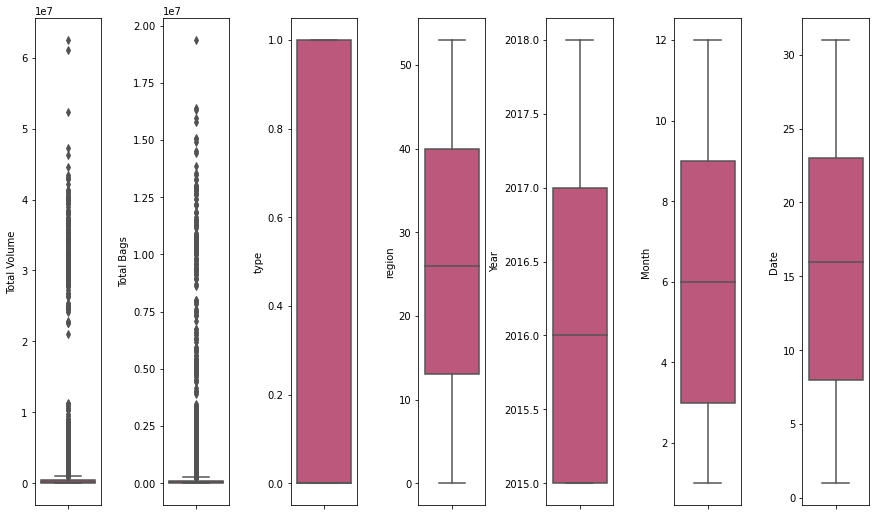

In [39]:
fig, ax = plt.subplots(ncols=7, nrows=1, figsize=(12,7))
index = 0
features = av.drop("AveragePrice", axis=1)
ax = ax.flatten()
for col, value in features.items():
    sns.boxplot(y=col, data=av, ax=ax[index], palette="plasma")
    index += 1
plt.tight_layout(pad=0.1, w_pad=0.5, h_pad=1.0)
plt.show()

In the above box plot we see some outliers present in our feature columns "Total Volume" and "Total Bags" 

# Using Z Score to remove outliers

In [43]:
z = np.abs(zscore(av))
threshold = 3
av1 = av[(z<3).all(axis = 1)]

print ("Shape of the dataframe before removing outliers: ", av.shape)
print ("Shape of the dataframe after removing outliers: ", av1.shape)
print ("Percentage of data loss post outlier removal: ", (av.shape[0]-av1.shape[0])/av.shape[0]*100)

av=av1.copy()

Shape of the dataframe before removing outliers:  (18249, 8)
Shape of the dataframe after removing outliers:  (17931, 8)
Percentage of data loss post outlier removal:  1.7425612362321221


# Skewness

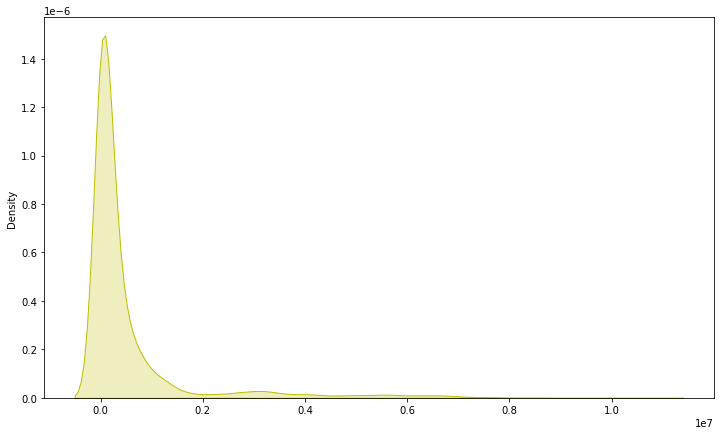

In [44]:
plt.figure(figsize=(12,7))
sns.distplot(x=av["Total Volume"], hist=False, color="y", kde_kws={"shade": True})
plt.show()

We see right skewness in the column Total Volume that had outliers too.

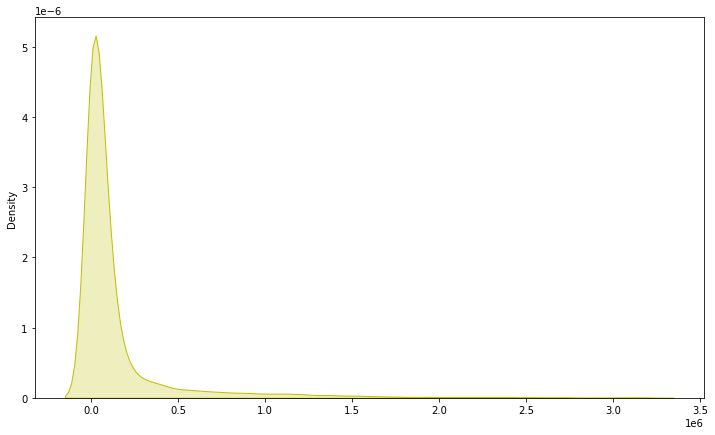

In [45]:
plt.figure(figsize=(12,7))
sns.distplot(x=av["Total Bags"], hist=False, color="y", kde_kws={"shade": True})
plt.show()

We see right skewness in the column Total Volume that had outliers too.



# Using Log Transform to fix skewness

In [48]:
for col in av.columns:
    if av.skew().loc[col]>0.55:
        av[col]=np.log1p(av[col])

In [49]:
av.skew()

AveragePrice    0.388855
Total Volume   -0.024234
Total Bags     -0.334742
type           -0.005912
region          0.014808
Year            0.225227
Month           0.114771
Date            0.014381
dtype: float64

Now that we check our dataset we have all the columns almost in the range of +/-0.5

# Splitting the dataset into 2 variables namely 'X' and 'Y' for feature and label

In [51]:
X = av.drop('AveragePrice', axis=1)
Y = av['AveragePrice']

# Feature Scaling

In [54]:

scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X.head(10)

,Total Volume,Total Bags,type,region,Year,Month,Date
0,-0.090582,-0.493196,-1.00296,-1.694204,-1.215795,1.650340,1.291781
1,-0.161393,-0.452528,-1.00296,-1.694204,-1.215795,1.650340,0.493909
2,0.183695,-0.523161,-1.00296,-1.694204,-1.215795,1.650340,-0.303964
3,0.002395,-0.677598,-1.00296,-1.694204,-1.215795,1.650340,-1.101837
4,-0.193989,-0.649161,-1.00296,-1.694204,-1.215795,1.367566,1.519745
5,-0.152446,-0.613603,-1.00296,-1.694204,-1.215795,1.367566,0.721872
6,0.027100,-0.513521,-1.00296,-1.694204,-1.215795,1.367566,-0.076001
7,0.148946,-0.603766,-1.00296,-1.694204,-1.215795,1.367566,-0.873873
8,0.107584,-0.369872,-1.00296,-1.694204,-1.215795,1.367566,-1.671746
9,-0.024906,-0.496942,-1.00296,-1.694204,-1.215795,1.084793,1.063818


# Finding best random state for building Regression Models


In [57]:
maxAccu=0
maxRS=0

for i in range(1, 1000):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=i)
    lr=LinearRegression()
    lr.fit(X_train, Y_train)
    pred = lr.predict(X_test)
    r2 = r2_score(Y_test, pred)
    
    if r2>maxAccu:
        maxAccu=r2
        maxRS=i

print("Best r2 score is", maxAccu,"on Random State", maxRS)


Best r2 score is 0.5021238214614996 on Random State 144


# Creating the training and testing data sets

In [58]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=144)

# Machine Learning Model for Regression with Evaluation Metrics

In [60]:
# Regression Model Function

def reg(model, X, Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=708)
    
    # Training the model
    model.fit(X_train, Y_train)
    
    # Predicting Y_test
    pred = model.predict(X_test)
    
    # RMSE - a lower RMSE score is better than a higher one
    rmse = mean_squared_error(Y_test, pred, squared=False)
    print("RMSE Score is:", rmse)
    
    # R2 score
    r2 = r2_score(Y_test, pred, multioutput='variance_weighted')*100
    print("R2 Score is:", r2)
    
    # Cross Validation Score
    cv_score = (cross_val_score(model, X, Y, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)
    
    # Result of r2 score minus cv score
    result = r2 - cv_score
    print("R2 Score - Cross Validation Score is", result)

In [61]:
# Linear Regression Model

model=LinearRegression()
reg(model, X, Y)

RMSE Score is: 0.2843241073646302
R2 Score is: 47.91662124818624
Cross Validation Score: 12.299369206677339
R2 Score - Cross Validation Score is 35.6172520415089


In [62]:
# Ridge Regression

model=Ridge(alpha=1e-2, normalize=True)
reg(model, X, Y)

RMSE Score is: 0.2846821292406461
R2 Score is: 47.785371532369645
Cross Validation Score: 12.572883789963557
R2 Score - Cross Validation Score is 35.21248774240609


In [63]:
# Lasso Regression

model=Lasso(alpha=1e-2, normalize=True, max_iter=1e5)
reg(model, X, Y)

RMSE Score is: 0.39412850641568486
R2 Score is: -0.08004140738024912
Cross Validation Score: -116.71934809126752
R2 Score - Cross Validation Score is 116.63930668388727


In [77]:
# Support Vector Regression

model=SVR(C=1.0, epsilon=0.2, kernel='poly', gamma='auto')
reg(model, X, Y)

RMSE Score is: 0.2628223421424579
R2 Score is: 55.4962770108585
Cross Validation Score: -17.860820345389936
R2 Score - Cross Validation Score is 73.35709735624843


In [65]:
# Random Forest Regressor

model=RandomForestRegressor(max_depth=2, max_features="sqrt")
reg(model, X, Y)

RMSE Score is: 0.30020212718885686
R2 Score is: 41.93702130659734
Cross Validation Score: -10.030830926201235
R2 Score - Cross Validation Score is 51.96785223279857


In [66]:
# K Neighbors Regressor

KNeighborsRegressor(n_neighbors=2, algorithm='kd_tree')
reg(model, X, Y)

RMSE Score is: 0.30047651046703194
R2 Score is: 41.83083424359996
Cross Validation Score: -12.300770241423123
R2 Score - Cross Validation Score is 54.13160448502308


In [67]:
# Gradient Boosting Regressor

model=GradientBoostingRegressor(loss='quantile', n_estimators=200, max_depth=5)
reg(model, X, Y)

RMSE Score is: 0.27615482132106683
R2 Score is: 50.86657477421749
Cross Validation Score: -19.632389854914546
R2 Score - Cross Validation Score is 70.49896462913203


In [71]:
# Ada Boost Regressor

model=AdaBoostRegressor(n_estimators=300, learning_rate=1.05, random_state=42)
reg(model, X, Y)

RMSE Score is: 0.2731855113353641
R2 Score is: 51.91749271525534
Cross Validation Score: -2.2062818905596826
R2 Score - Cross Validation Score is 54.12377460581502


In [74]:
# Extra Trees Regressor

model=ExtraTreesRegressor(n_estimators=200, max_features='sqrt', n_jobs=6)
reg(model, X, Y)

RMSE Score is: 0.17695650338558574
R2 Score is: 79.82540441886951
Cross Validation Score: 17.061409161601187
R2 Score - Cross Validation Score is 62.76399525726832


In [76]:
# XGB Regressor

model=XGBRegressor()
reg(model, X, Y)

RMSE Score is: 0.13156329541646664
R2 Score is: 88.84829511848271
Cross Validation Score: 39.48804192771808
R2 Score - Cross Validation Score is 49.36025319076463


# Hyper parameter tuning on the best ML Model

In [79]:
# Choosing XGB Regressor

fmod_param = {'n_estimators' : [200, 400, 600],
              'gamma' : [2.0, 3.0, 4.0],
              'max_depth' : [4, 6, 8],
              'n_jobs' : [-2, -1, 1]
             }

After comparing all the regression models I have selected XGB Regressor as my best model.

In [88]:
Final_Model = XGBRegressor(gamma=2.0, max_depth=8, n_estimators=200, n_jobs=-2)
Classifier = Final_Model.fit(X_train, Y_train)
fmod_pred = Final_Model.predict(X_test)
fmod_r2 = r2_score(Y_test, fmod_pred)*100
print("R2 score for the Best Model is:", fmod_r2)

R2 score for the Best Model is: 78.88427707762189


In [89]:
filename = "FinalModel_E02.pkl"
joblib.dump(Final_Model, filename)

['FinalModel_E02.pkl']